In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from scipy.stats import ttest_ind

In [192]:
#1 Load the Excel file
file_path = "/Users/samarthverma/Desktop/Houes analytics Vancouver/Main 1 excel fiel.xlsx"  # Replace with your file path
data = pd.read_excel(file_path, sheet_name="Revised Data")

mean_prices = data.groupby('Year Sold')['Sold Price in $'].mean().reset_index() #Mean of 'Sold price in $'

print("Mean Prices Per Year:") #Mean prices over the years.
print(mean_prices)


Mean Prices Per Year:
   Year Sold  Sold Price in $
0       2010     1.548500e+06
1       2011     1.796212e+06
2       2012     1.759286e+06
3       2013     1.830556e+06
4       2014     1.887143e+06
5       2015     1.985571e+06
6       2016     2.115000e+06
7       2017     2.311000e+06
8       2018     2.265556e+06
9       2019     2.330000e+06


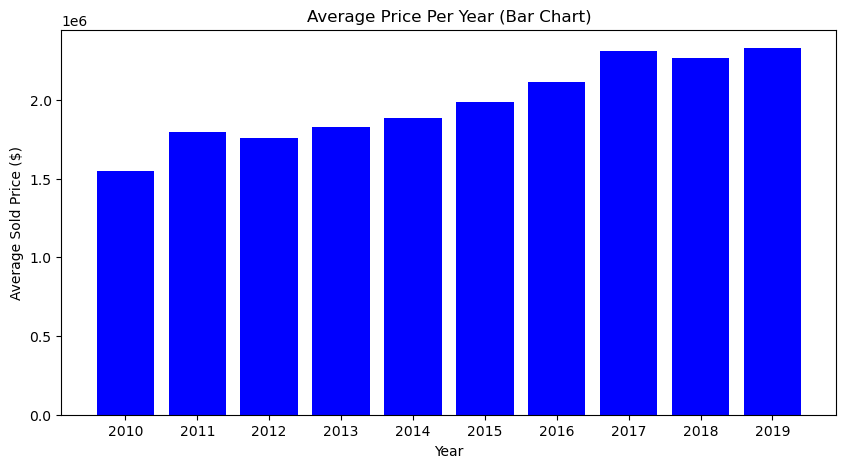

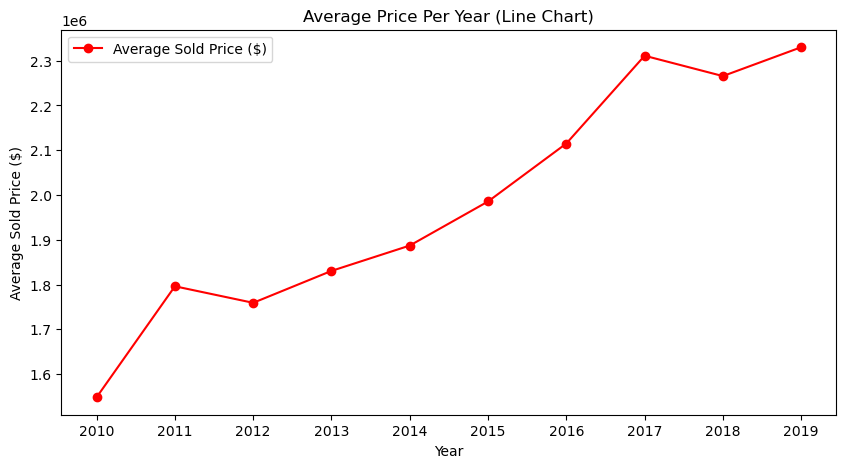

In [172]:
#1 #Visualisation
plt.figure(figsize=(10, 5))
plt.bar(mean_prices['Year Sold'], mean_prices['Sold Price in $'], color='blue')
plt.title('Average Price Per Year (Bar Chart)')
plt.xlabel('Year')
plt.ylabel('Average Sold Price ($)')
plt.xticks(mean_prices['Year Sold'])
plt.show()

#TypeII
plt.figure(figsize=(10, 5))
plt.plot(mean_prices['Year Sold'], mean_prices['Sold Price in $'], marker='o', color='red', label='Average Sold Price ($)')
plt.title('Average Price Per Year (Line Chart)')
plt.xlabel('Year')
plt.ylabel('Average Sold Price ($)')
plt.xticks(mean_prices['Year Sold'])
plt.legend()
plt.show()

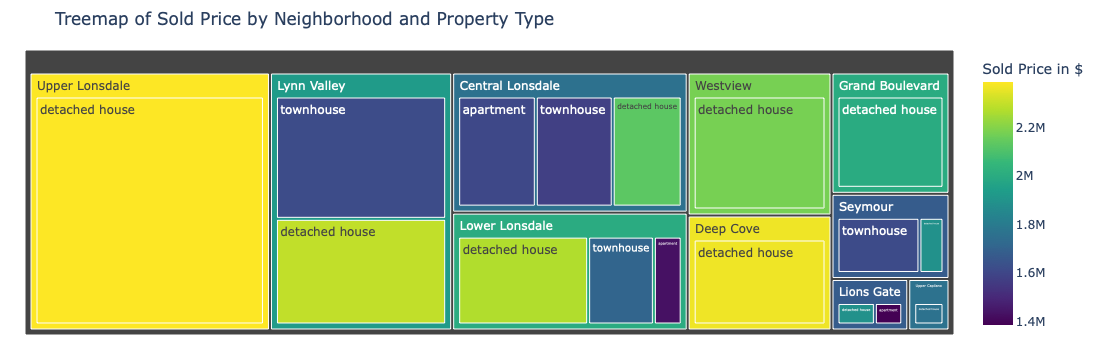

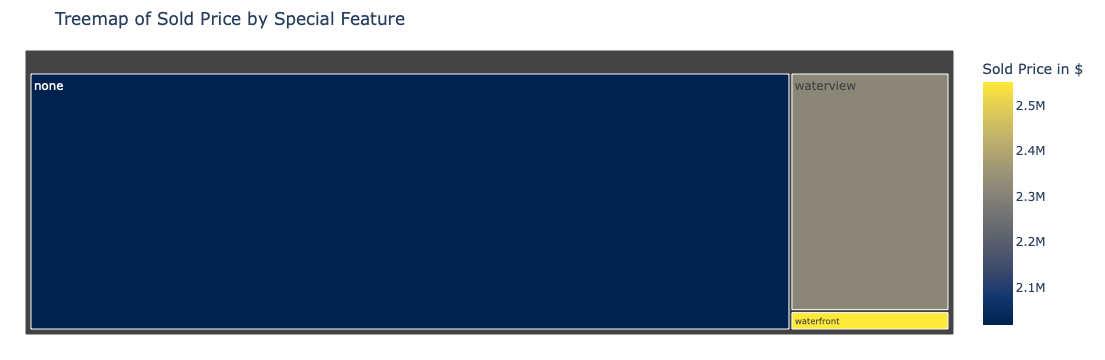

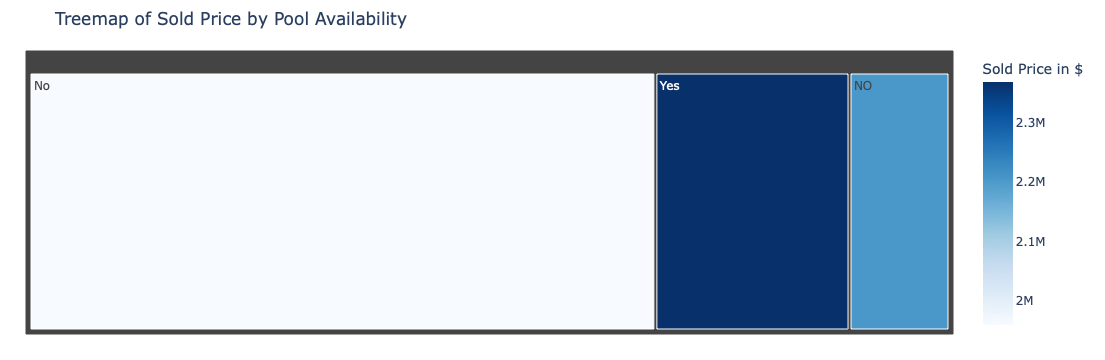

In [174]:
#2 #Treemap for Sold Price by Neighborhood
fig_neighborhood = px.treemap(
    data,
    path=['Neighbrhood', 'Property Type'],  #Hierarchical structure: Neighborhood > Property Type
    values='Sold Price in $',  
    color='Sold Price in $',  #Color represents sold price
    color_continuous_scale='Viridis',  #Color scale for visualization
    title='Treemap of Sold Price by Neighborhood and Property Type'
)
fig_neighborhood.update_layout(margin=dict(t=50, l=25, r=25, b=25))  # Adjusted margins for better display
fig_neighborhood.show()

#Treemap for Sold Price by Special Feature
fig_special_feature = px.treemap(
    data,
    path=['special feature'],  # Hierarchical structure: Special Feature
    values='Sold Price in $', 
    color='Sold Price in $',  #Color represents sold price
    color_continuous_scale='Cividis',  #Color scale for visualization
    title='Treemap of Sold Price by Special Feature'
)
fig_special_feature.update_layout(margin=dict(t=50, l=25, r=25, b=25))  
fig_special_feature.show()

#Treemap for Sold Price by Pool Availability
fig_pool = px.treemap(
    data,
    path=['Pool'],  #Hierarchical structure: Pool (Yes/No)
    values='Sold Price in $',  
    color='Sold Price in $',  #Color represents sold price
    color_continuous_scale='Blues',  #Color scale for visualization
    title='Treemap of Sold Price by Pool Availability'
)
fig_pool.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig_pool.show()

In [176]:
#3 #pivoting 
pivot_table = pd.pivot_table(#Grouping by Neighborhood and Special Feature, calculate the average Sold Price
    data,
    values='Sold Price in $',  # Target variable
    index='Neighbrhood',       # Rows: Neighborhood
    columns='special feature', # Columns: Special Feature
    aggfunc='mean',            # Aggregation: Mean (average)
    margins=True,              # Add totals for rows and columns
    margins_name='Total'       # Name for totals row/column
)
pivot_table = pivot_table.round(2)

#Results
print("Pivot Table: Average Sold Price by Neighborhood and Special Feature")
print(pivot_table)


Pivot Table: Average Sold Price by Neighborhood and Special Feature
special feature          none  waterfront   waterview       Total
Neighbrhood                                                      
Central Lonsdale   1708333.31         NaN         NaN  1708333.31
Deep Cove          2100000.00   2550000.0  2262500.00  2283333.33
Grand Boulevard    2012000.00         NaN  1795000.00  1975833.33
Lions Gate         1637500.00         NaN         NaN  1637500.00
Lower Lonsdale     1916083.33         NaN         NaN  1916083.33
Lynn Valley        1854081.62         NaN         NaN  1854081.62
Seymour            1665000.00         NaN         NaN  1665000.00
Upper Capilano     1760000.00         NaN         NaN  1760000.00
Upper Lonsdale     2360714.29         NaN  2291875.00  2335681.82
Westview           2110714.29         NaN  2260000.00  2129375.00
Total              1935798.18   2550000.0  2245714.29  1985828.76


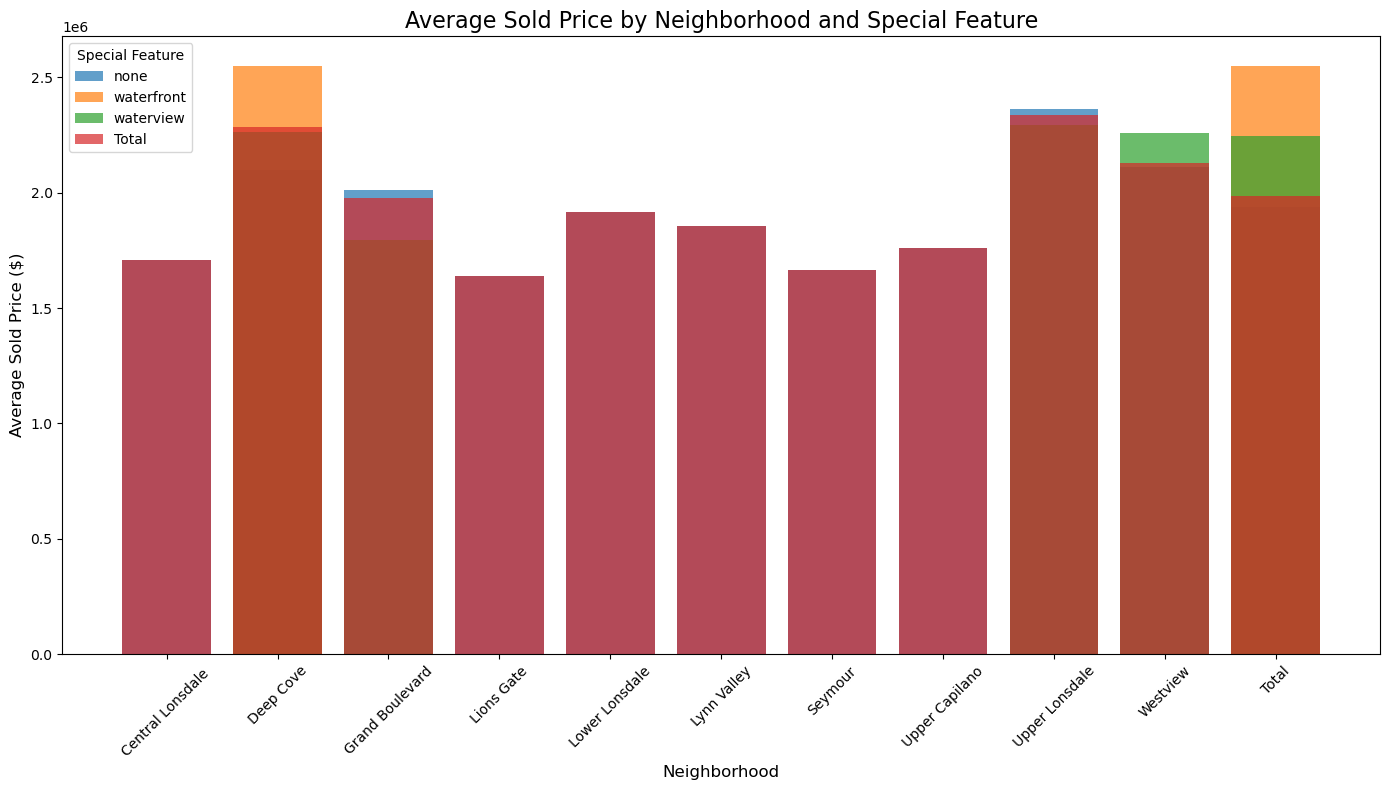

In [178]:
#3 #Visualisation
pivot_flat = pivot_table.reset_index().melt(
    id_vars='Neighbrhood', 
    var_name='Special Feature', 
    value_name='Average Sold Price'
)

#Cleaning the data
pivot_flat = pivot_flat.dropna()

# Plot grouped bar chart
plt.figure(figsize=(14, 8))
for feature in pivot_flat['Special Feature'].unique():
    subset = pivot_flat[pivot_flat['Special Feature'] == feature]
    plt.bar(
        subset['Neighbrhood'], 
        subset['Average Sold Price'], 
        label=feature, 
        alpha=0.7
    )

#labels, title, and legend
plt.title('Average Sold Price by Neighborhood and Special Feature', fontsize=16)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Average Sold Price ($)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Special Feature')
plt.tight_layout() 
plt.show()

In [180]:
"""Q4 Regression Analysis"""

data = data[['Year Sold', 'Age ', 'Building Size', 'Sold Price in $']].dropna()

# Define the independent variables (predictors) and dependent variable (response)
X = data[['Year Sold', 'Age ', 'Building Size']]  # Predictors
y = data['Sold Price in $']  # Response

# Add a constant to the predictors (for intercept in regression)
X = sm.add_constant(X)

# Step 3: Fit the regression model
model = sm.OLS(y, X).fit()

# Step 4: Print the summary of the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        Sold Price in $   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     93.67
Date:                Sun, 05 Jan 2025   Prob (F-statistic):           2.83e-28
Time:                        17:45:48   Log-Likelihood:                -1352.5
No. Observations:                  99   AIC:                             2713.
Df Residuals:                      95   BIC:                             2723.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.691e+08   1.51e+07    -11.184

In [182]:
#5 #Regression with Age and sold price
data = data[['Age ', 'Sold Price in $']].dropna()

# Define the independent variable (Age) and dependent variable (Sold Price)
X = data['Age ']  # Predictor: Age of the property
y = data['Sold Price in $']  # Response: Sold Price

# Add a constant to the predictor (for intercept in regression)
X = sm.add_constant(X)

# Step 3: Fit the regression model
model = sm.OLS(y, X).fit()

# Step 4: Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Sold Price in $   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     10.61
Date:                Sun, 05 Jan 2025   Prob (F-statistic):            0.00155
Time:                        17:45:49   Log-Likelihood:                -1415.5
No. Observations:                  99   AIC:                             2835.
Df Residuals:                      97   BIC:                             2840.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.758e+06   8.04e+04     21.854      0.0

In [202]:
data = pd.read_excel(file_path, sheet_name="Revised Data")
#6 #Regression analysis bedrooms and sold price
data = data[['bedrooms', 'Sold Price in $']].dropna()

X = data['bedrooms']  # Predictor: Age of the property
y = data['Sold Price in $']  # Response: Sold Price

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()#fitteing the model

#Results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Sold Price in $   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     31.62
Date:                Sun, 05 Jan 2025   Prob (F-statistic):           1.81e-07
Time:                        17:46:52   Log-Likelihood:                -1406.7
No. Observations:                  99   AIC:                             2817.
Df Residuals:                      97   BIC:                             2822.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.213e+06   1.42e+05      8.532      0.0

In [206]:
data = pd.read_excel(file_path, sheet_name="Revised Data")
#7 #Cleaning and structuring the data
data = data[['Pool', 'Sold Price in $']].dropna()

#Pool = Yes and Pool = No
pool_yes = data[data['Pool'] == 'Yes']['Sold Price in $']
pool_no = data[data['Pool'] == 'No']['Sold Price in $']

#t-test to compare the means of the two groups
t_stat, p_value = ttest_ind(pool_yes, pool_no, equal_var=False)
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4e}")

mean_pool_yes = pool_yes.mean()#Calculating mean for each group
mean_pool_no = pool_no.mean()
print(f"Mean Sold Price (Pool = Yes): ${mean_pool_yes:,.2f}")
print(f"Mean Sold Price (Pool = No): ${mean_pool_no:,.2f}")


T-Statistic: 4.1259, P-Value: 3.4008e-04
Mean Sold Price (Pool = Yes): $2,305,000.00
Mean Sold Price (Pool = No): $1,883,690.80


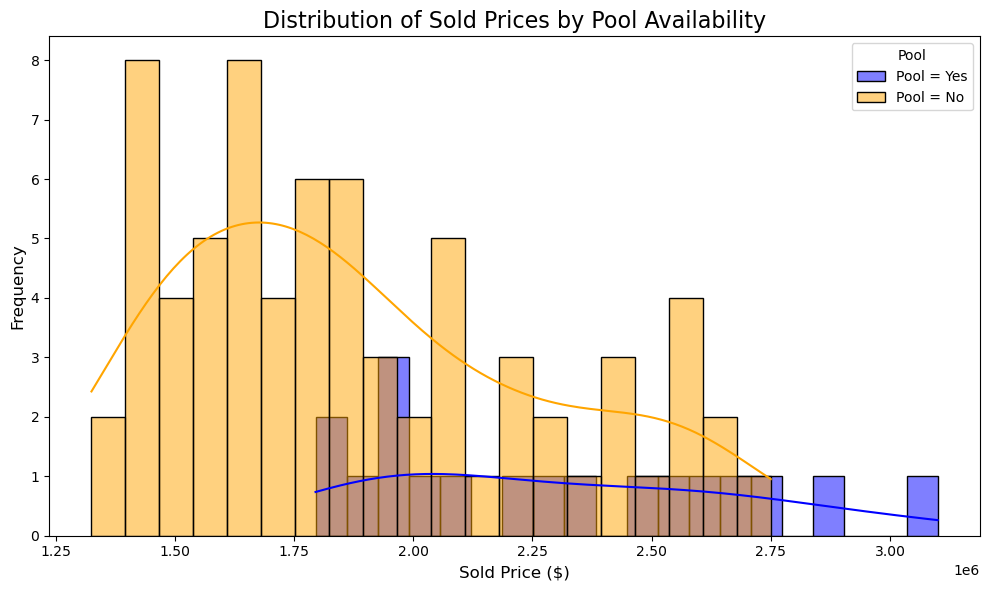

/var/folders/md/1nzr13m53_q812ff9fl_x85w0000gn/T/ipykernel_2310/410372786.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




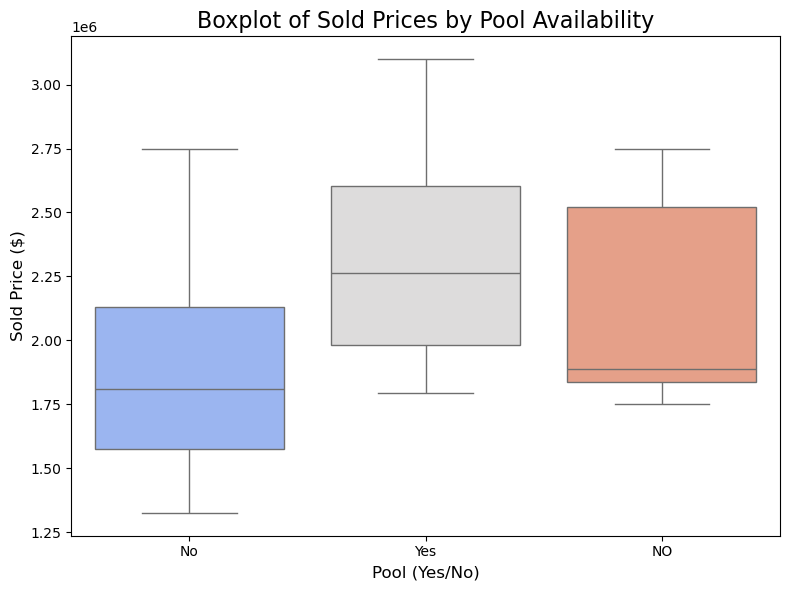

In [208]:
#7 #Visualisation
plt.figure(figsize=(10, 6))
sns.histplot(pool_yes, color='blue', kde=True, label='Pool = Yes', bins=20)
sns.histplot(pool_no, color='orange', kde=True, label='Pool = No', bins=20)
plt.title('Distribution of Sold Prices by Pool Availability', fontsize=16)
plt.xlabel('Sold Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Pool')
plt.tight_layout()
plt.show()

# Step 6: Boxplot for visual comparison of distributions
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Pool', y='Sold Price in $', palette='coolwarm')
plt.title('Boxplot of Sold Prices by Pool Availability', fontsize=16)
plt.xlabel('Pool (Yes/No)', fontsize=12)
plt.ylabel('Sold Price ($)', fontsize=12)
plt.tight_layout()
plt.show()

Mean Sold Prices by Neighborhood:
         Neighbrhood  Sold Price in $
8     Upper Lonsdale     2.335682e+06
1          Deep Cove     2.283333e+06
9           Westview     2.129375e+06
2    Grand Boulevard     1.975833e+06
4     Lower Lonsdale     1.916083e+06
5        Lynn Valley     1.854082e+06
7     Upper Capilano     1.760000e+06
0  Central Lonsdale      1.708333e+06
6            Seymour     1.665000e+06
3         Lions Gate     1.637500e+06


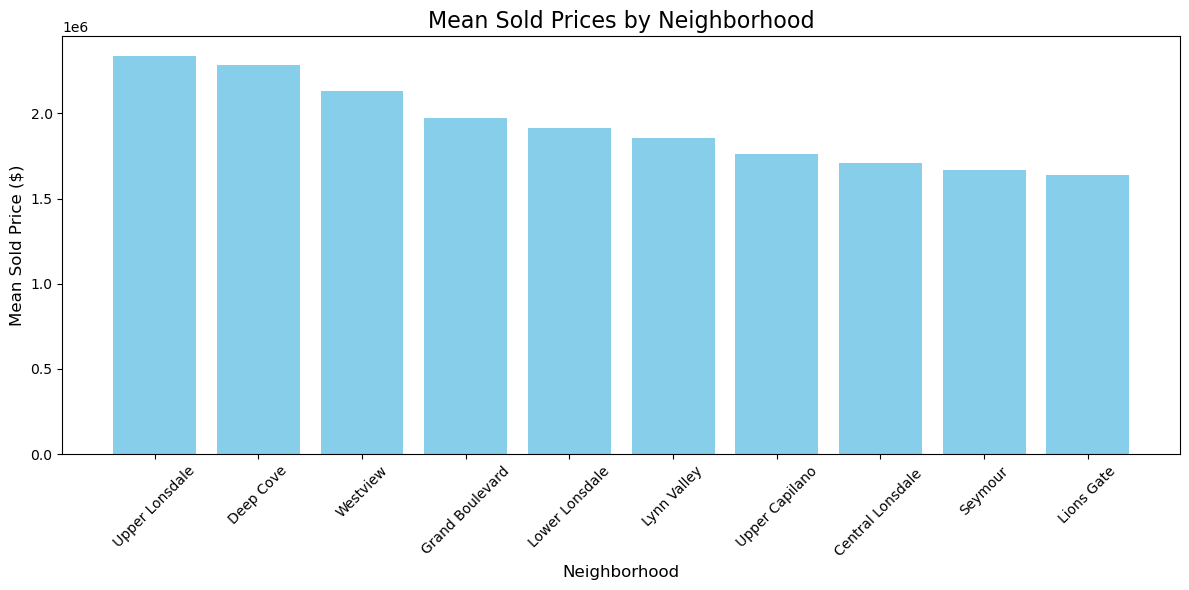

In [212]:
data = pd.read_excel(file_path, sheet_name="Revised Data")

#Grouping data by Neighborhood
mean_prices_by_neighborhood = data.groupby('Neighbrhood')['Sold Price in $'].mean().reset_index()

# Sort by mean price for better visualization
mean_prices_by_neighborhood = mean_prices_by_neighborhood.sort_values(by='Sold Price in $', ascending=False)

# Print the calculated mean prices
print("Mean Sold Prices by Neighborhood:")
print(mean_prices_by_neighborhood)

# Step 3: Visualize the results using a bar chart
plt.figure(figsize=(12, 6))
plt.bar(mean_prices_by_neighborhood['Neighbrhood'], mean_prices_by_neighborhood['Sold Price in $'], color='skyblue')
plt.title('Mean Sold Prices by Neighborhood', fontsize=16)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Mean Sold Price ($)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [164]:


# Step 2: Prepare the data for regression
# Select relevant columns and drop rows with missing values
data = data[['Year Sold', 'Building Size', 'Sold Price in $']].dropna()

# Define the independent variables (predictors) and dependent variable (response)
X = data[['Year Sold', 'Building Size']]  # Predictors: Year Sold and Building Size
y = data['Sold Price in $']  # Response: Sold Price

# Add a constant to the predictors (for intercept in regression)
X = sm.add_constant(X)

# Step 3: Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Step 4: Print the summary of the regression results
print(model.summary())

# Step 5: Extract and display coefficients in a table format
coefficients = pd.DataFrame({
    'Variable': ['Intercept'] + X.columns.tolist()[1:],  # Include intercept and predictors
    'Coefficient': model.params.values,
    'Standard Error': model.bse.values,
    't-Statistic': model.tvalues.values,
    'P-Value': model.pvalues.values
}).round(4)

print("\nRegression Coefficients Table:")
print(coefficients)


                            OLS Regression Results                            
Dep. Variable:        Sold Price in $   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     140.7
Date:                Sun, 05 Jan 2025   Prob (F-statistic):           2.88e-29
Time:                        17:42:34   Log-Likelihood:                -1352.9
No. Observations:                  99   AIC:                             2712.
Df Residuals:                      96   BIC:                             2719.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.714e+08   1.48e+07    -11.568